# Isolation Forest - Ooutliers Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

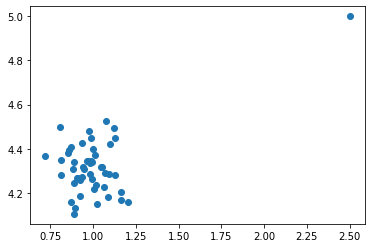

In [2]:
X, y = make_blobs(n_samples=50, 
                  n_features=2,
                  centers=1,
                  cluster_std=0.1, 
                  random_state=0)

# on crée l'anomalie
X[-1, :] = np.array([2.5, 5])

# on affiche le nuage de points
plt.scatter(X[:, 0],X[:, 1])

In [3]:
model = IsolationForest(contamination=0.01, random_state=0)

model.fit(X)

IsolationForest(contamination=0.01, random_state=0)

In [4]:
model.predict(X)

# 1  => inliers ("normales")
# -1 => outliers ("anormales")

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1])

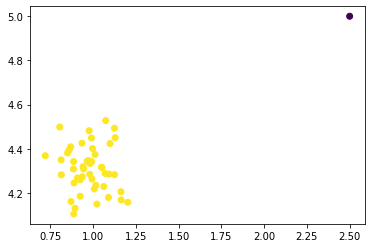

In [5]:
plt.scatter(X[:, 0],X[:, 1], c=model.predict(X))

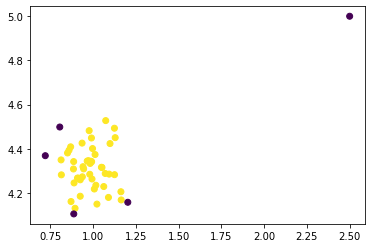

In [6]:
model = IsolationForest(contamination=0.1, 
                        n_estimators=100,
                        random_state=0)
model.fit(X)
plt.scatter(x=X[:, 0],y=X[:, 1], c=model.predict(X))

## Application de décontamination sur le Digits datasets

In [7]:
from sklearn.datasets import load_digits

digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [8]:
images = digits.images
X = digits.data
y = digits.target

In [9]:
X[42]

array([ 0.,  0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
       12.,  0.,  0.,  0.,  0.,  1., 12., 16., 11.,  0.,  0.,  0.,  2.,
       12., 16., 16., 10.,  0.,  0.,  0.,  6., 11.,  5., 15.,  6.,  0.,
        0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  2.,
       16., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.])

In [10]:
images[42]

array([[ 0.,  0.,  0.,  0., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16., 12.,  0.,  0.],
       [ 0.,  0.,  1., 12., 16., 11.,  0.,  0.],
       [ 0.,  2., 12., 16., 16., 10.,  0.,  0.],
       [ 0.,  6., 11.,  5., 15.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 16.,  8.,  0.,  0.]])

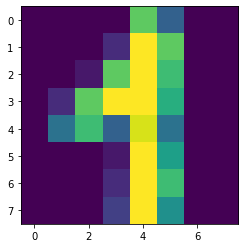

In [11]:
plt.imshow(images[42])

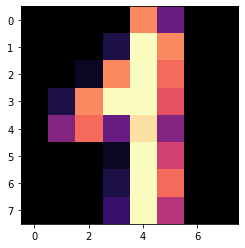

In [12]:
plt.imshow(images[42], cmap='magma')

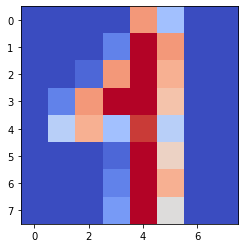

In [13]:
plt.imshow(images[42], cmap='coolwarm')

In [14]:
from sklearn.ensemble import IsolationForest

In [15]:
model = IsolationForest(contamination=0.02, 
                        random_state=0)

model.fit(X, y)

IsolationForest(contamination=0.02, random_state=0)

In [16]:
outliers = model.predict(X) == -1
outliers

array([False, False, False, ..., False, False, False])

In [17]:
# on filtre les images grâce au boolean indexing
images[outliers]

array([[[ 0.,  0.,  0., ..., 15.,  4.,  0.],
        [ 0.,  0.,  0., ..., 16., 12.,  0.],
        [ 0.,  0.,  0., ..., 16., 12.,  0.],
        ...,
        [ 0.,  9., 16., ...,  1.,  0.,  0.],
        [ 0.,  3.,  8., ...,  9.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16., 12.,  0.]],

       [[ 0.,  6., 16., ..., 15., 10.,  0.],
        [ 0.,  9., 16., ...,  6.,  5.,  0.],
        [ 0., 12., 16., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  3., ...,  0.,  0.,  0.],
        [ 0.,  1.,  5., ...,  0.,  0.,  0.],
        [ 0.,  9., 16., ...,  0.,  0.,  0.]],

       [[ 0.,  4., 16., ..., 16.,  5.,  0.],
        [ 0., 11., 16., ...,  8.,  3.,  0.],
        [ 0., 10., 16., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0., 12., ...,  0.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.],
        [ 0.,  4., 16., ...,  0.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.

Text(0.5, 1.0, '2')

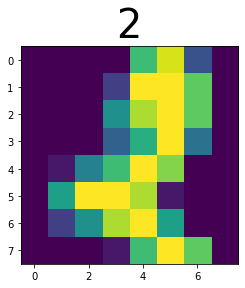

In [18]:
plt.imshow(images[outliers][0])
plt.title(y[outliers][0], fontsize=40)

Text(0.5, 1.0, '5')

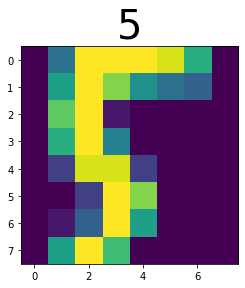

In [19]:
plt.imshow(images[outliers][1])
plt.title(y[outliers][1], fontsize=40)

In [20]:
outliers.sum()

36

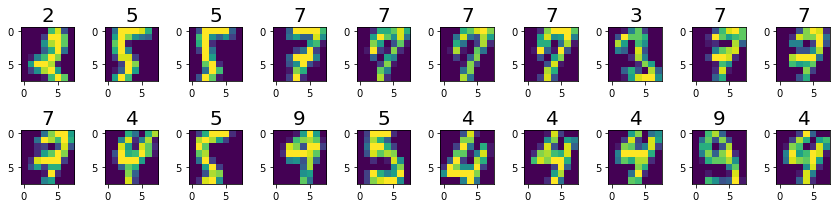

In [21]:
plt.figure(figsize=(12, 3))
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(images[outliers][i])
    plt.title(y[outliers][i], fontsize=20)
    plt.tight_layout()

# Principal Component Analysis (PCA)

## 1er cas : Réduction de dimension à des fins de visualisation

In [22]:
from sklearn.decomposition import PCA

X.shape

(1797, 64)

### 2D

In [23]:
model_2D = PCA(n_components=2)

X_reduced_2D = model_2D.fit_transform(X)

In [24]:
X_reduced_2D.shape

(1797, 2)

In [25]:
X_reduced_2D

array([[ -1.25946495,  21.27488271],
       [  7.95761417, -20.76870125],
       [  6.99192081,  -9.95598588],
       ...,
       [ 10.80128134,  -6.96025285],
       [ -4.87209844,  12.42395689],
       [ -0.3443952 ,   6.36555289]])

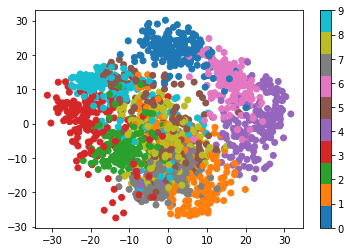

In [26]:
plt.scatter(x=X_reduced_2D[:, 0], y=X_reduced_2D[:, 1], c=y, cmap='tab10')
plt.colorbar()

In [27]:
model_2D.components_

array([[ 1.50107921e-17, -1.73094672e-02, -2.23428850e-01,
        -1.35913306e-01, -3.30323000e-02, -9.66340983e-02,
        -8.32945298e-03,  2.26899862e-03, -3.20516396e-04,
        -1.19308902e-01, -2.44451675e-01,  1.48512741e-01,
        -4.67319327e-02, -2.17740742e-01, -1.48136905e-02,
         4.47779424e-03, -4.94135606e-05, -7.95419262e-02,
         8.33951424e-02,  2.15915323e-01, -1.72126791e-01,
        -1.63712095e-01,  2.86444411e-02,  4.23251830e-03,
         9.85488952e-05,  6.42319273e-02,  2.54093315e-01,
        -3.56771173e-02, -2.09462569e-01, -4.31311611e-02,
         5.13118684e-02,  2.13422729e-04,  0.00000000e+00,
         1.59950890e-01,  3.68690778e-01,  1.64406835e-01,
         8.52007943e-02,  3.72982666e-02,  2.15866970e-02,
         0.00000000e+00,  1.28865575e-03,  1.06945284e-01,
         3.03067453e-01,  2.47813027e-01,  2.09637291e-01,
         1.22325112e-02, -3.69458532e-02,  1.61484988e-03,
         6.93023416e-04, -8.35144706e-03, -5.58599157e-0

### 3D

In [28]:
model_3D = PCA(n_components=3)

X_reduced_3D = model_3D.fit_transform(X)
X_reduced_3D.shape

(1797, 3)

In [47]:
type(X_reduced_3D)

numpy.ndarray

In [43]:
color = y.astype(str)

In [45]:
import plotly_express as px

fig = px.scatter_3d(data_frame=X_reduced_3D, 
                    x=X_reduced_3D[:, 0], 
                    y=X_reduced_3D[:, 1], 
                    z=X_reduced_3D[:, 2],
                    color=color)
fig.show()

In [46]:
# indique le % de variance préservée par chaque composante
model_3D.explained_variance_ratio_

# 0.14890594 => 14,89% de l'information de mon dataset est contenue dans la CP1
# 0.13618771 => 13.62% de l'information de mon dataset est contenue dans la CP2
# 0.11794594 => 11.79% de l'information de mon dataset est contenue dans la CP3

array([0.14890594, 0.13618771, 0.11794594])

## 2ème cas : Compression

In [49]:
X.shape

(1797, 64)

In [48]:
model_global = PCA(n_components=64)

X_global = model_global.fit_transform(X)

X_global.shape

(1797, 64)

In [50]:
model_global.explained_variance_ratio_

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

In [51]:
np.cumsum(model_global.explained_variance_ratio_)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

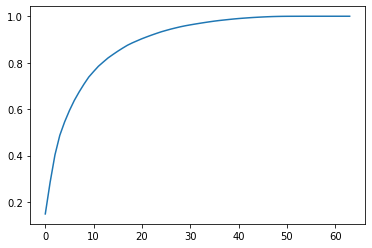

In [52]:
plt.plot(np.cumsum(model_global.explained_variance_ratio_))

In [54]:
np.argmax(np.cumsum(model_global.explained_variance_ratio_) > 0.90)

20

In [56]:
np.argmin(np.cumsum(model_global.explained_variance_ratio_) < 0.90)

20

In [57]:
np.cumsum(model_global.explained_variance_ratio_) > 0.90

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [58]:
X.shape

(1797, 64)

In [59]:
X.shape[1]

64

(0.0, 64.0)

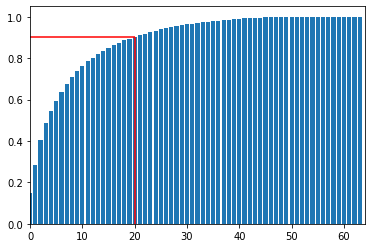

In [68]:
n_dims = X.shape[1]

variance = model_global.explained_variance_ratio_

meilleure_dim = np.argmax(np.cumsum(variance) > 0.90)

plt.bar(range(n_dims), np.cumsum(variance))

plt.hlines(0.9, 0, meilleure_dim, colors='r') #hlines(y, xmin, xmax)
plt.vlines(meilleure_dim, 0, 0.9, colors='r') #vlines(x, xmin, xmax)
plt.xlim(0, n_dims)

In [69]:
model_global = PCA(n_components=meilleure_dim)

X_reduced = model_global.fit_transform(X)

#### Si on veut visualiser une image compressée, il faut d'abord la décompresser pour qu'elle est de nouveau 64 pixeles (8x8)

In [71]:
X_recovered = model_global.inverse_transform(X_reduced)
X_recovered

array([[-1.94839052e-15,  6.34103624e-02,  5.15700876e+00, ...,
         1.44319215e+00, -2.51502597e+00, -7.38515874e-01],
       [ 1.74153386e-15, -1.25669605e-01, -7.42830394e-01, ...,
         6.63262655e+00,  5.27250647e-01,  3.02215457e-01],
       [-3.43371692e-16, -1.35626105e-01, -1.18914163e+00, ...,
         1.66158500e+01,  9.58467607e+00,  1.77356076e+00],
       ...,
       [ 2.77975760e-16, -2.86922251e-01,  2.08876746e+00, ...,
         6.88369721e+00, -2.50563205e-01, -3.37565933e-02],
       [ 7.86223608e-16, -5.23963347e-01,  2.73427230e+00, ...,
         1.00530668e+01,  9.99564921e-01,  2.83710117e-01],
       [-6.73730789e-16,  3.09675973e-01,  8.97530244e+00, ...,
         1.18514447e+01,  3.43587071e+00,  4.76955495e-01]])

In [78]:
X_recovered[0].shape

(64,)

In [79]:
X_recovered[0].reshape(8,8)

array([[-1.94839052e-15,  6.34103624e-02,  5.15700876e+00,
         1.31378724e+01,  8.87688757e+00,  2.42349691e+00,
         2.44603194e+00,  7.22905320e-01],
       [-1.01172715e-02,  4.12981829e-01,  1.41103550e+01,
         1.32061215e+01,  1.09933887e+01,  1.18306690e+01,
         4.68722589e+00,  6.51976959e-01],
       [-1.54838683e-03,  2.30348971e+00,  1.48056045e+01,
         2.60005649e+00,  1.06823210e+00,  1.27076737e+01,
         6.61672471e+00,  2.31469050e-01],
       [-1.37499087e-03,  4.14198749e+00,  1.16252595e+01,
        -2.22231502e-01, -1.35353747e+00,  9.02891409e+00,
         7.57854457e+00,  9.84566870e-03],
       [ 0.00000000e+00,  5.29998158e+00,  9.21884641e+00,
        -6.10707360e-01,  1.16945138e-01,  9.08509751e+00,
         6.45544966e+00,  0.00000000e+00],
       [ 8.78017539e-03,  3.82072683e+00,  1.13280739e+01,
        -1.01621343e+00,  1.62490189e+00,  1.18956831e+01,
         5.18478840e+00, -7.89214778e-02],
       [ 2.35132029e-02,  1.536270

Text(0.5, 1.0, '8')

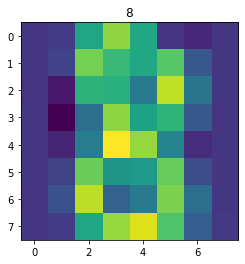

In [81]:
plt.imshow(X_recovered[8].reshape(8,8))
plt.title(y[8])

Text(0.5, 1.0, '8')

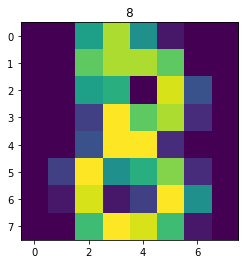

In [87]:
#plt.imshow(images[8])
plt.imshow(X[8].reshape(8,8))
plt.title(y[8])

#### - il faut standardiser vos données avant d'utiliser la PCA (StandardScaler)
#### - PCA est normalement conçue pour traiter les variables continues (pas des dummies)  
#### - PCA n'est pas efficace sur les datasets non-linéaires  